In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
#from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor 

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
import seaborn as sns
from sklearn import metrics

In [214]:
df=pd.read_csv('car_data.csv')
final_dataset=df[['Year','Selling_Price','Showroom_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset['Current Year']=2020
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset=final_dataset.drop(['Current Year'],axis=1)
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [3]:
df=pd.read_csv('car_data.csv')

In [3]:
df.shape

(301, 9)

In [4]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [3]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df[df['Seller_Type']=='Dealer'].mean()


Year              2013.712821
Selling_Price        6.721692
Present_Price       10.886308
Kms_Driven       39850.133333
Owner                0.020513
dtype: float64

In [8]:
df[df['Seller_Type']=='Individual'].mean()

Year              2013.471698
Selling_Price        0.870943
Present_Price        1.635283
Kms_Driven       31606.915094
Owner                0.084906
dtype: float64

In [89]:
print(*df[['Present_Price','Selling_Price']].values)

[5.59 3.35] [9.54 4.75] [9.85 7.25] [4.15 2.85] [6.87 4.6 ] [9.83 9.25] [8.12 6.75] [8.61 6.5 ] [8.89 8.75] [8.92 7.45] [3.6  2.85] [10.38  6.85] [9.94 7.5 ] [7.71 6.1 ] [7.21 2.25] [10.79  7.75] [10.79  7.25] [10.79  7.75] [5.09 3.25] [7.98 2.65] [3.95 2.85] [5.71 4.9 ] [8.01 4.4 ] [3.46 2.5 ] [4.41 2.9 ] [4.99 3.  ] [5.87 4.15] [6.49 6.  ] [3.95 1.95] [10.38  7.45] [5.98 3.1 ] [4.89 2.35] [7.49 4.95] [9.95 6.  ] [8.06 5.5 ] [7.74 2.95] [7.2  4.65] [2.28 0.35] [3.76 3.  ] [7.98 2.25] [7.87 5.85] [3.98 2.55] [7.15 1.95] [8.06 5.5 ] [2.69 1.25] [12.04  7.5 ] [4.89 2.65] [4.15 1.05] [7.71 5.8 ] [9.29 7.75] [30.61 14.9 ] [30.61 23.  ] [19.77 18.  ] [30.61 16.  ] [10.21  2.75] [15.04  3.6 ] [7.27 4.5 ] [18.54  4.75] [6.8 4.1] [35.96 19.99] [18.61  6.95] [7.7 4.5] [35.96 18.75] [35.96 23.5 ] [36.23 33.  ] [6.95 4.75] [23.15 19.75] [20.45  9.25] [13.74  4.35] [20.91 14.25] [6.76 3.95] [12.48  4.5 ] [18.61  7.45] [5.71 2.65] [8.93 4.9 ] [6.8  3.95] [14.68  5.5 ] [12.35  1.5 ] [22.83  5.25] [3

In [53]:
print(*df['Fuel_Type'])

Petrol Diesel Petrol Petrol Diesel Diesel Petrol Diesel Diesel Diesel Petrol Diesel Petrol Petrol Petrol Diesel Diesel Diesel CNG Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Diesel Diesel Petrol Diesel Diesel Diesel CNG Petrol Petrol Petrol Petrol Petrol Petrol Petrol Diesel Petrol Petrol Petrol Petrol Petrol Petrol Diesel Diesel Diesel Diesel Petrol Petrol Petrol Petrol Petrol Diesel Petrol Petrol Diesel Diesel Diesel Diesel Petrol Diesel Petrol Petrol Diesel Diesel Petrol Petrol Diesel Petrol Petrol Petrol Petrol Diesel Diesel Diesel Diesel Diesel Diesel Petrol Diesel Petrol Petrol Petrol Petrol Diesel Petrol Diesel Petrol Petrol Diesel Petrol Petrol Diesel Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petrol Petro

In [56]:
#print(df[df['Seller_Type']=='Dealer'].count())
print(df[df['Seller_Type']=='Individual'].count())

Car_Name         106
Year             106
Selling_Price    106
Present_Price    106
Kms_Driven       106
Fuel_Type        106
Seller_Type      106
Transmission     106
Owner            106
dtype: int64


In [9]:
own=df['Owner']
print(*own)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [25]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [73]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
final_dataset['Current Year']=2020

In [75]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [11]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [52]:
final_dataset.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
5,9.25,9.83,2071,0,2,1,0,0,1
6,6.75,8.12,18796,0,5,0,1,0,1
7,6.50,8.61,33429,0,5,1,0,0,1
8,8.75,8.89,20273,0,4,1,0,0,1
9,7.45,8.92,42367,0,5,1,0,0,1


In [12]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [82]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [13]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [51]:
#print(*final_dataset['Fuel_Type_Diesel'])
print(*final_dataset['Fuel_Type_Petrol'])

1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1


In [80]:
print(*round(final_dataset['Present_Price'],1))

5.6 9.5 9.8 4.2 6.9 9.8 8.1 8.6 8.9 8.9 3.6 10.4 9.9 7.7 7.2 10.8 10.8 10.8 5.1 8.0 4.0 5.7 8.0 3.5 4.4 5.0 5.9 6.5 4.0 10.4 6.0 4.9 7.5 10.0 8.1 7.7 7.2 2.3 3.8 8.0 7.9 4.0 7.2 8.1 2.7 12.0 4.9 4.2 7.7 9.3 30.6 30.6 19.8 30.6 10.2 15.0 7.3 18.5 6.8 36.0 18.6 7.7 36.0 36.0 36.2 7.0 23.2 20.4 13.7 20.9 6.8 12.5 18.6 5.7 8.9 6.8 14.7 12.4 22.8 30.6 14.9 7.8 25.4 13.5 13.5 23.7 92.6 13.7 6.0 6.8 18.6 16.1 13.7 30.6 22.8 18.6 25.4 18.6 18.6 20.4 1.9 1.8 1.8 1.6 1.5 2.4 3.4 1.5 1.5 1.5 1.8 1.5 2.4 1.4 1.5 1.5 1.5 1.9 1.5 1.9 1.3 1.5 1.2 1.5 1.8 1.8 1.0 0.8 0.9 0.8 0.9 0.8 1.0 1.0 0.8 0.7 1.2 0.8 0.9 1.0 1.2 0.8 0.8 0.8 1.0 0.8 0.8 0.8 0.9 0.9 0.8 0.6 1.0 1.0 0.9 0.5 0.5 0.8 0.5 0.5 1.0 0.8 1.0 1.0 0.5 0.5 0.6 0.8 0.7 0.5 0.8 0.6 0.6 0.5 0.7 0.8 1.0 0.6 0.5 1.0 0.5 0.5 0.6 0.5 0.8 0.6 0.5 0.5 0.6 0.6 0.8 0.6 0.8 0.6 0.8 0.3 0.5 0.5 0.6 0.6 0.8 6.8 5.7 4.6 4.4 5.7 7.1 5.7 8.1 5.7 4.6 14.8 13.6 6.8 5.7 9.4 4.4 4.4 9.4 9.4 4.4 6.8 7.6 9.4 9.4 4.6 5.7 4.4 9.4 6.8 9.4 9.4 14.8 5.7 5.7 9.4 4.4 13.

In [216]:
final_dataset.corr()

,Selling_Price,Showroom_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Showroom_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [217]:
final_dataset.describe()

,Selling_Price,Showroom_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000,1.000000,1.000000,1.000000,1.000000


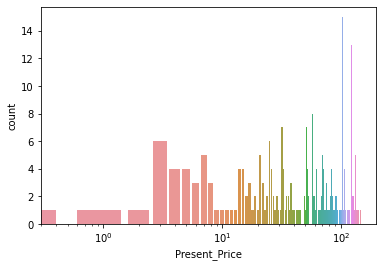

In [59]:
#dfsell=final_dataset['Present_']
g=sns.countplot('Present_Price',data=final_dataset)
g.set_xscale("log")

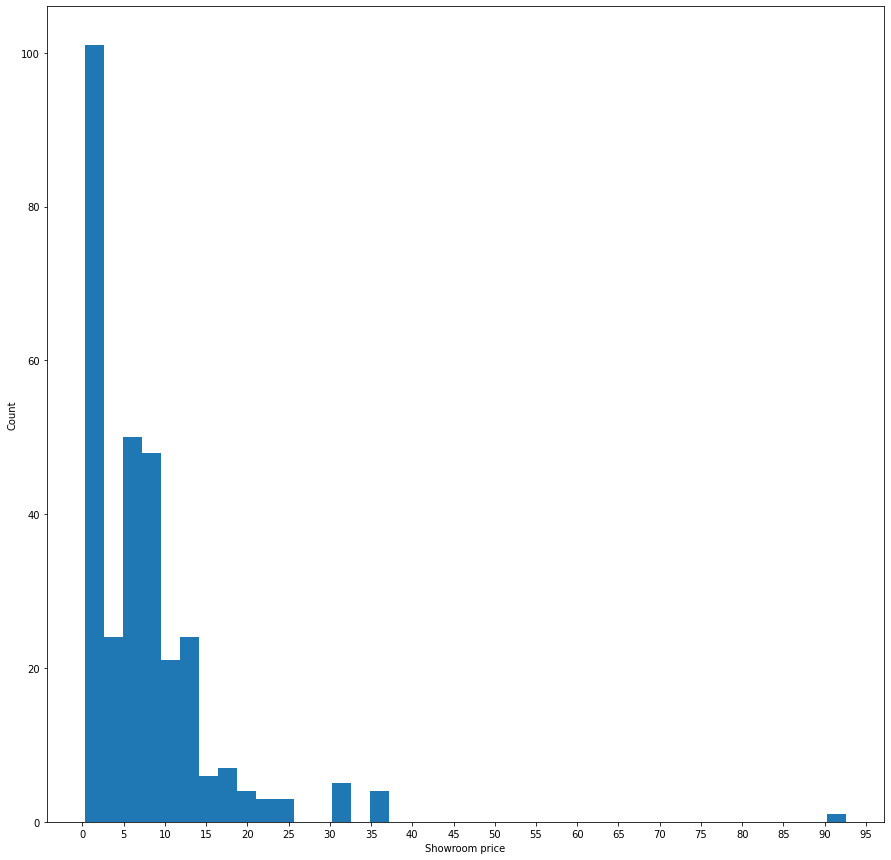

In [219]:
#g=sns.jointplot(x='Present_Price',y='Selling_Price',data=final_dataset,kind='hex')
#g.set_xscale("log")
#g.set_yscale("log")
n=40
plt.figure(figsize=(15,15))
plt.hist(final_dataset['Showroom_Price'], bins=n)
#plt.title('Bar graph')
plt.ylabel('Count')
plt.xlabel('Showroom price')
tick_spacing=5
#plt.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))

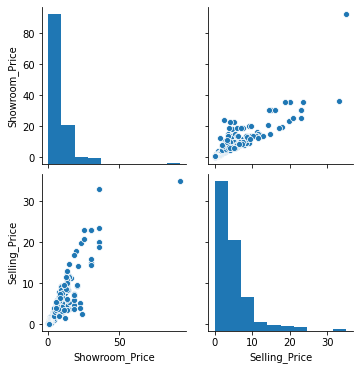

In [220]:
sns.pairplot(final_dataset[['Showroom_Price','Selling_Price']])

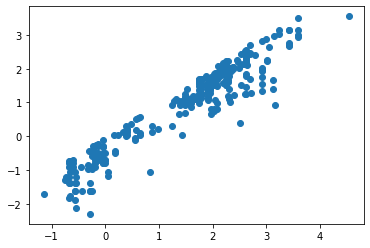

In [221]:
X=np.log(final_dataset['Showroom_Price'].values)
Y=np.log(final_dataset['Selling_Price'].values)
plt.scatter(X,Y)

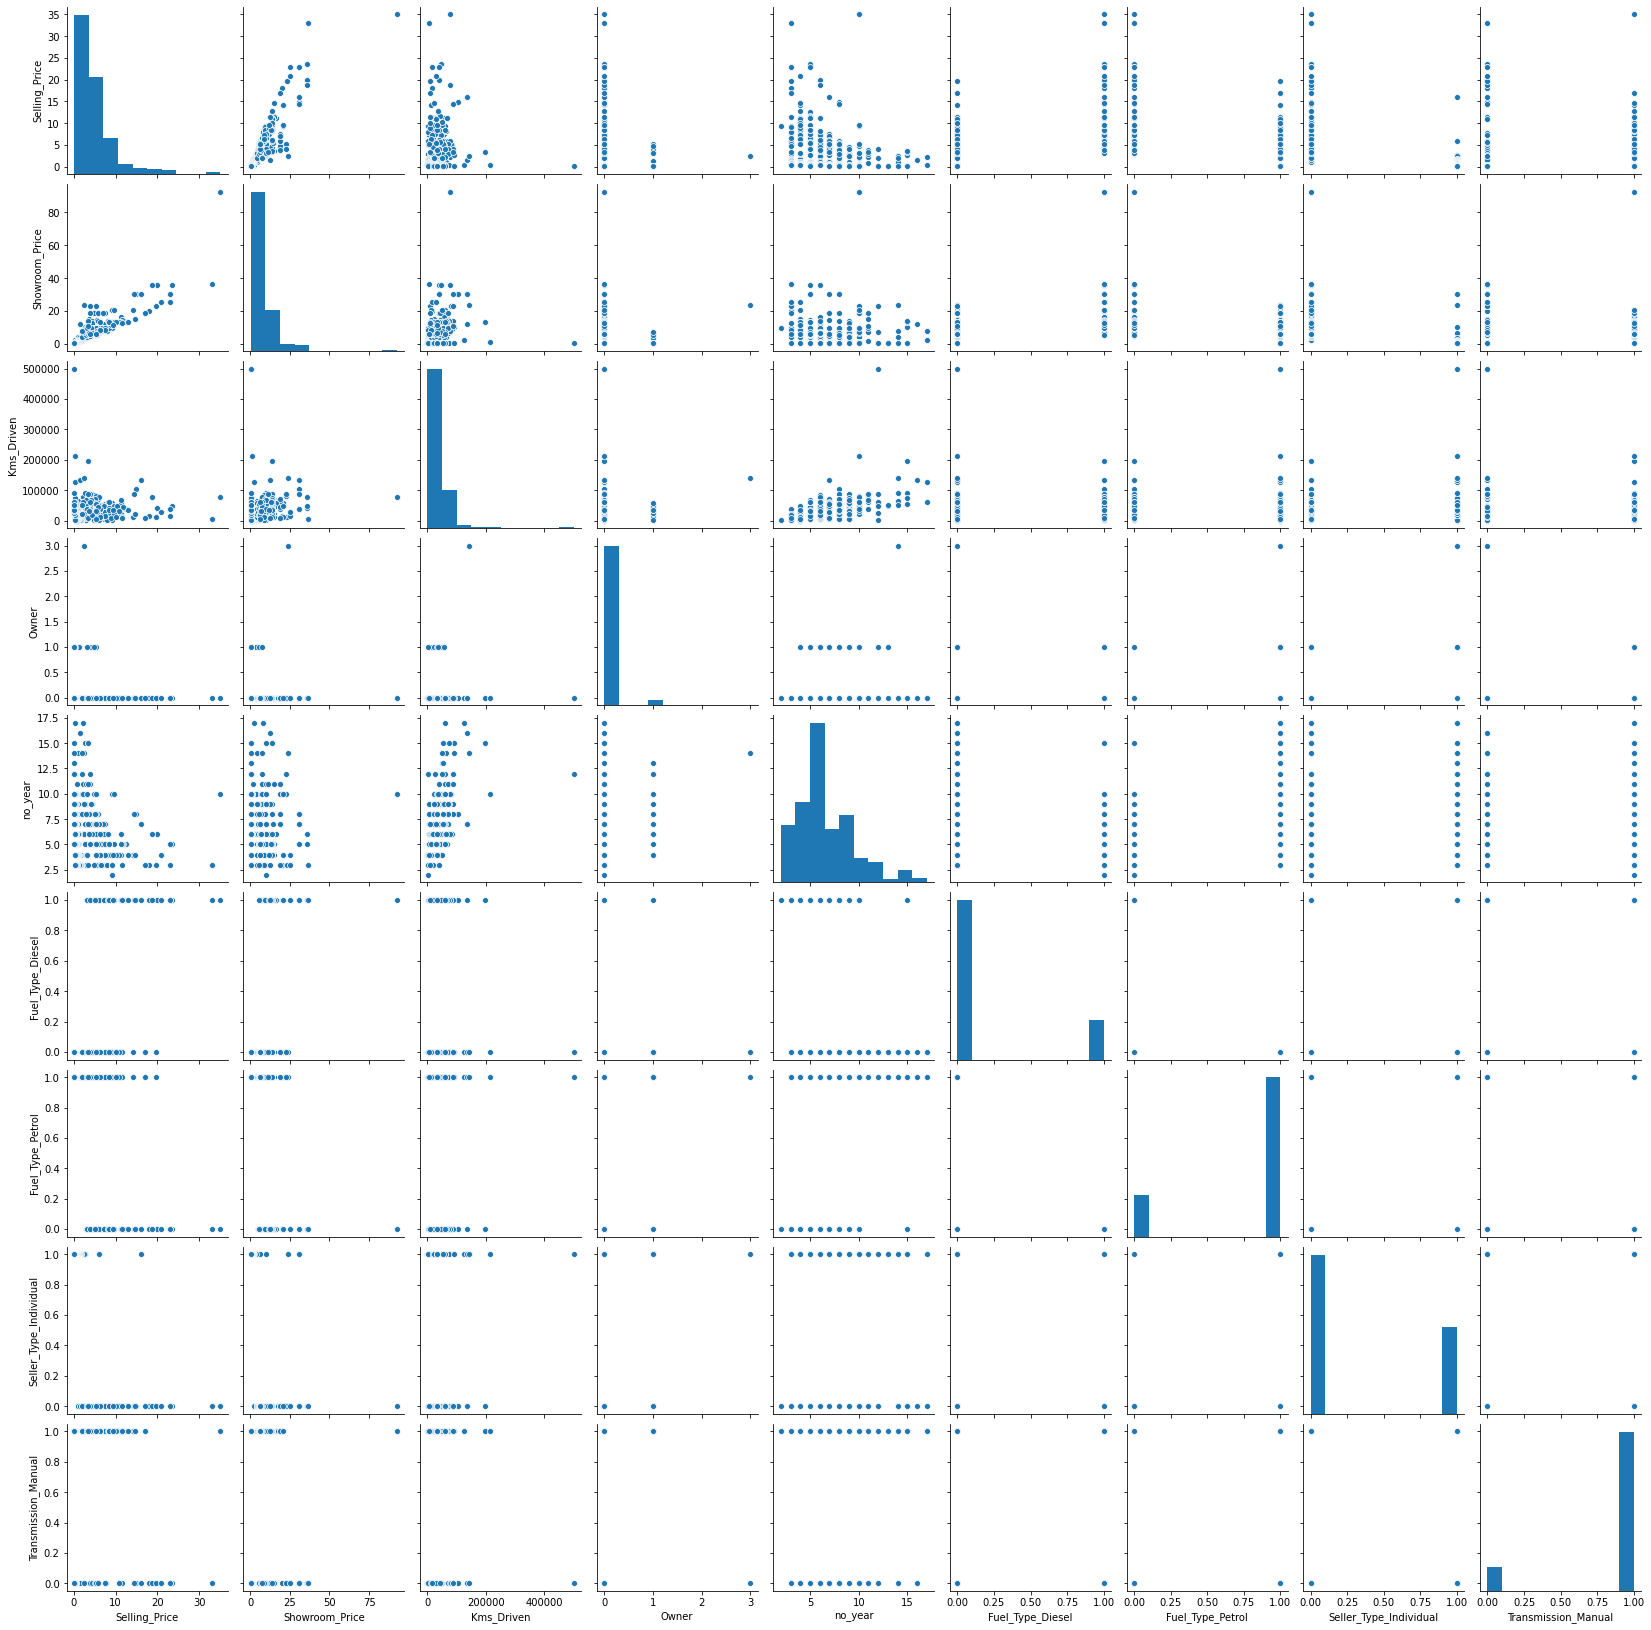

In [222]:
sns.pairplot(final_dataset)

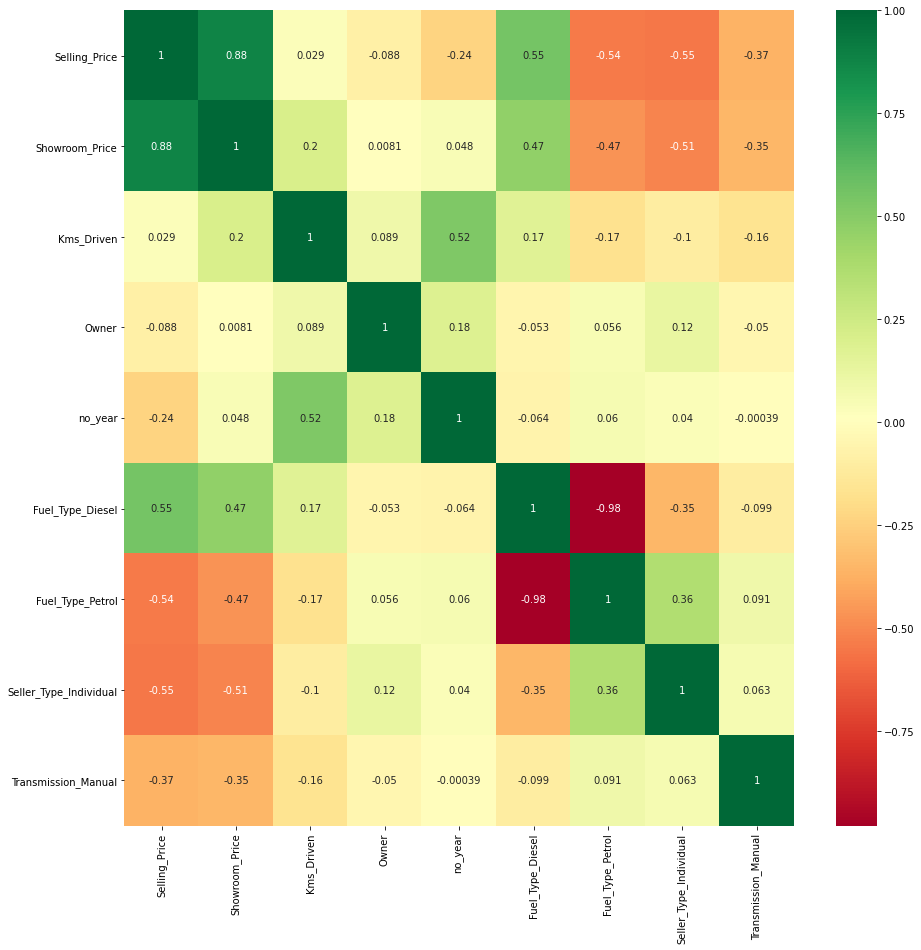

In [223]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [224]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [40]:
X['Owner'].unique()

array([0, 1, 3])

In [17]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [43]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [225]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [215]:
#model = ExtraTreesRegressor()
#model.fit(X,y)
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(5).plot(kind='barh')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)
print(rf_random.best_score_)
print(rf_random.best_params_)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#model evaluation
predictions=rf_random.predict(X_test)
r_rf=result(y_test,predictions)
#print("MSLE : {}".format(r_rf[0]))
#print("Root MSLE : {}".format(r_rf[1]))
print("R2 Score : {} or {}%".format(r_rf[2],r_rf[3]))
#accu['KNN']=r4_knn

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.6s finished


-3.545785387702483
{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
R2 Score : 0.8819776567597108 or 88.1978%


In [226]:
print(model.feature_importances_)

[0.37370853 0.03967307 0.00040578 0.07640976 0.22610114 0.01182337
 0.13372582 0.13815253]


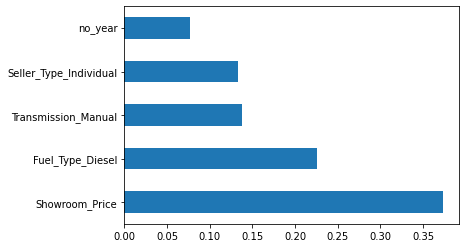

In [227]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#print(X_train[0])
print((X_train.loc[0].values))
print(y_train[0])

[5.59e+00 2.70e+04 0.00e+00 6.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00]
3.35


In [106]:
type(X_train)

pandas.core.frame.DataFrame

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor=RandomForestRegressor()

In [228]:
# different decision tree values
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [230]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [231]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [232]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [233]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [234]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [235]:
rf_random.best_score_

-3.61569766545014

In [236]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price'>

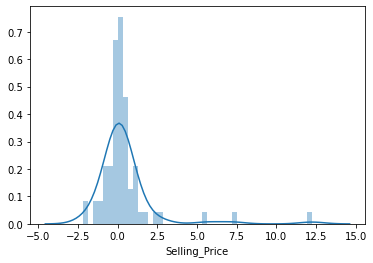

In [237]:
sns.distplot(y_test-predictions)   ## Looks like normal distribution -- prediction is good

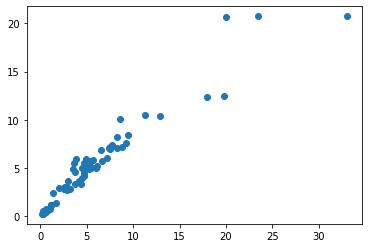

In [238]:
plt.scatter(y_test,predictions)      ## y_test and prediction are in a straight line -- prediction is good

In [37]:
from sklearn import metrics

In [239]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#model evaluation
r_rf=result(y_test,predictions)
#print("MSLE : {}".format(r_rf[0]))
#print("Root MSLE : {}".format(r_rf[1]))
print("R2 Score : {} or {}%".format(r_rf[2],r_rf[3]))
#accu['KNN']=r4_knn

R2 Score : 0.8832894329183251 or 88.3289%


In [40]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [240]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8613212003317481
MSE: 3.730739377076923
RMSE: 1.9315121995672


# Comparsion of few different models

In [197]:

#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,0:1].values.T
    #y = df.reindex(columns=0)
    #print(y.shape)
    y=y[0]
    #print(y.shape)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    return (X_train,X_test,y_train,y_test)
mylist=list(range(len(list(final_dataset.columns))))
del mylist[0]
X_train,X_test,y_train,y_test=trainingData(final_dataset,mylist)

def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])
#print(list(range(len(list(df.columns))-1)))

In [138]:
mylist=list(range(len(list(final_dataset.columns))))
del mylist[0]
print(mylist)

[1, 2, 3, 4, 5, 6, 7, 8]


In [168]:
#X_train.shape
print((X_train.iloc[0].values))
print((y_train[0]))
#[5.59e+00 2.70e+04 0.00e+00 6.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00]
#3.35

[7.87e-01 1.50e+04 0.00e+00 6.00e+00 0.00e+00 1.00e+00 1.00e+00 1.00e+00]
0.55


# Linear Regression

In [199]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
#r1_lr=result(y_test,y_pred)
#print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

MSLE : 0.0664684580928441
Root MSLE : 0.2578147747760863
R2 Score : 0.8620126784331272 or 86.2013%


# Ridge Regression

In [200]:
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)


#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.06931538594260565
Root MSLE : 0.2632781531813942
R2 Score : 0.8537799529628233 or 85.378%


# KNN

K = 1  , Root MSLE = 0.9693651246081914
K = 2  , Root MSLE = 0.9423513417610508
K = 3  , Root MSLE = 0.8973897066099893
K = 4  , Root MSLE = 0.8710012510714142
K = 5  , Root MSLE = 0.8707657838838461
K = 6  , Root MSLE = 0.9102192849846864
K = 7  , Root MSLE = 0.8678338291090734
K = 8  , Root MSLE = 0.8368938887278834
K = 9  , Root MSLE = 0.8551901655580899


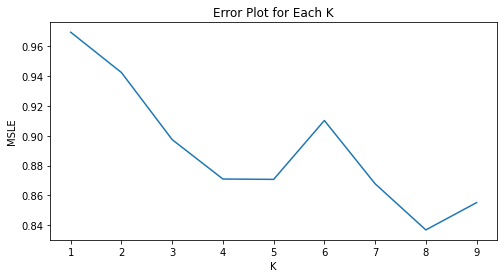

In [207]:
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)
    

#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [209]:

KNN=KNeighborsRegressor(n_neighbors=8) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.7003913809900789
Root MSLE : 0.8368938887278834
R2 Score : -0.15968483601131478 or -15.9685%


# AdaBoost

In [202]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)


#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

accu['AdaBoost']=r7_ab

MSLE : 0.019648360124714086
Root MSLE : 0.14017260832528616
R2 Score : 0.9262068452207499 or 92.6207%


# Random Forest

In [203]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)


r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest']=r5_rf

MSLE : 0.019596002182811368
Root MSLE : 0.1399857213533272
R2 Score : 0.9124948766104236 or 91.2495%


# XGBoost

In [204]:

#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))
accu['XGBoost']=r8_xg

MSLE : 0.020941463063322584
Root MSLE : 0.14471165489801638
R2 Score : 0.9142575479677701 or 91.4258%


# Comparison

In [210]:
accu.to_csv('errors.csv')
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,KNN,AdaBoost,RandomForest,XGBoost
MSLE,0.066468,0.069315,0.700391,0.019648,0.019596,0.020941
Root MSLE,0.257815,0.263278,0.836894,0.140173,0.139986,0.144712
R2 Score,0.862013,0.853780,-0.159685,0.926207,0.912495,0.914258
Accuracy(%),86.201300,85.378000,-15.968500,92.620700,91.249500,91.425800


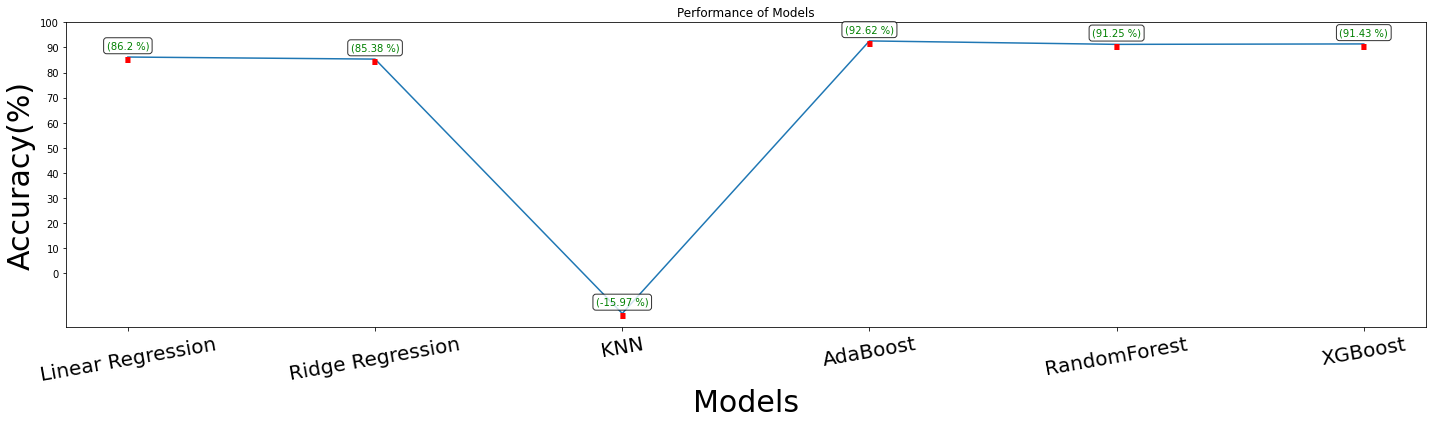

In [211]:

model_accuracy=accu.loc['Accuracy(%)']

x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();